# Machine Learning in Biology: A scikit-learn Tutorial
## Data Loading and Preprocessing

We'll start by loading our data, which consists of 4 CSV files holding normalized expression data for various genes. We added another two datasets, of another Cancer! We'll ;earn how to classify tumors and healthy in each tossue and we'lll also see, that we can easily classify which tissue we are looking at. Each CSV file has the same structure, with the first column being an ID, the second column being the class (Tumor or Normal), and the subsequent columns being gene expression data. We'll add the dataset class here as well as the tumor class.

Here's how you can load and preprocess your data:

In [51]:
import pandas as pd
import os

# Specify the path to the folder containing the CSV files
folder_path = 'data'

# Use os to get a list of all files in the folder
files = os.listdir(folder_path)

# Filter the list to only include CSV files
files = [file for file in files if file.endswith('.csv')]

# cancer type information
# note: this trick only works, because we now the order of the files :)
cancer_dataset = dict(zip(files, ["HNC", "HNC", "BRC", "BRC"]))

# List to hold data frames
dfs = []

# Loop through each file
for file in files:
    # Create the full file path
    file_path = os.path.join(folder_path, file)
    # Read in the data and add a 'dataset' column with the file name
    df = pd.read_csv(file_path).assign(dataset=file).assign(tumor_type=cancer_dataset[file])
    # Add the data frame to the list
    dfs.append(df)

# Concatenate all data frames into one
df = pd.concat(dfs, ignore_index=True)
df = df.set_index("ID")

df.head()


,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994,dataset,tumor_type
ID,,,,,,,,,,,,,,,,,,,,,
SRR1754117,Tumor,11.093040,2.969844,9.990933,9.452693,7.986177,9.782317,13.648825,11.115678,10.310412,...,3.015522,2.131915,2.131915,2.131915,4.995241,2.131915,2.131915,3.363149,GSE64912.csv,HNC
SRR1754118,Tumor,10.929458,3.070538,9.800101,9.491018,8.397969,9.329050,13.754111,10.134869,10.026614,...,2.131915,2.131915,2.131915,2.131915,5.312684,2.131915,2.131915,3.701540,GSE64912.csv,HNC
SRR1754119,Tumor,11.463203,2.687601,9.814206,9.852032,7.969095,8.044819,13.755808,10.882487,10.463199,...,2.956442,2.131915,2.131915,2.131915,5.694262,2.718716,2.131915,2.718764,GSE64912.csv,HNC
SRR1754120,Tumor,10.764904,4.287089,9.850854,9.293921,7.428099,8.031387,12.805946,10.987034,10.183807,...,2.766204,2.131915,2.131915,2.131915,6.048311,2.131915,2.131915,3.021964,GSE64912.csv,HNC
SRR1754121,Tumor,11.609858,3.281690,10.259462,10.125975,8.132683,7.441034,12.175295,10.790123,10.029304,...,2.750876,2.131915,2.131915,2.131915,5.299987,2.131915,2.131915,2.131915,GSE64912.csv,HNC


Now that we have our data loaded and preprocessed, let's move on to the next step: normalization and scaling.

##  Normalization and Scaling

Before we start with the machine learning part, it's important to discuss normalization and scaling. These are crucial steps in preprocessing data for machine learning models. They ensure that each feature contributes proportionately to the final distance, which can improve the performance of some machine learning algorithms.

Scaling and normalization are sometimes used interchangeably, but they refer to different things. There is no "official" definition, but here we'll use the fiollowing:
Scaling is the process of changing the range of the data, while normalization is the process of changing the shape of the distribution of the data.

In scaling, we typically transform the data to have a certain range, such as [0, 1] or [-1, 1]. This is useful when the features have different units or scales, and we want to ensure that each feature contributes equally to the final distance.

In normalization, we transform the data to have a specific distribution, such as a Gaussian distribution with mean 0 and standard deviation 1. This is useful when the absolute values of the features are not important, but their relative values are. Normalization can also help to reduce the effects of outliers.

In our case, the data has been pre-processed and normalized using DESeq2's vst method. This method transforms the count data to a common scale, allowing for comparisons across samples. Since our data is already normalized, we might not need to scale it. However, it's still a good practice to check whether scaling is necessary. And since we also plan to combine multiple datasets, that otherwise have a strong batch effect (as we saw already in the gene expression part), we'll additionally use the standard scaler. This actually scales the data AND applies a normalization, as we see, bot the range of the data and its distribution changing. 

Here's how you can check the distribution of your data:

c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


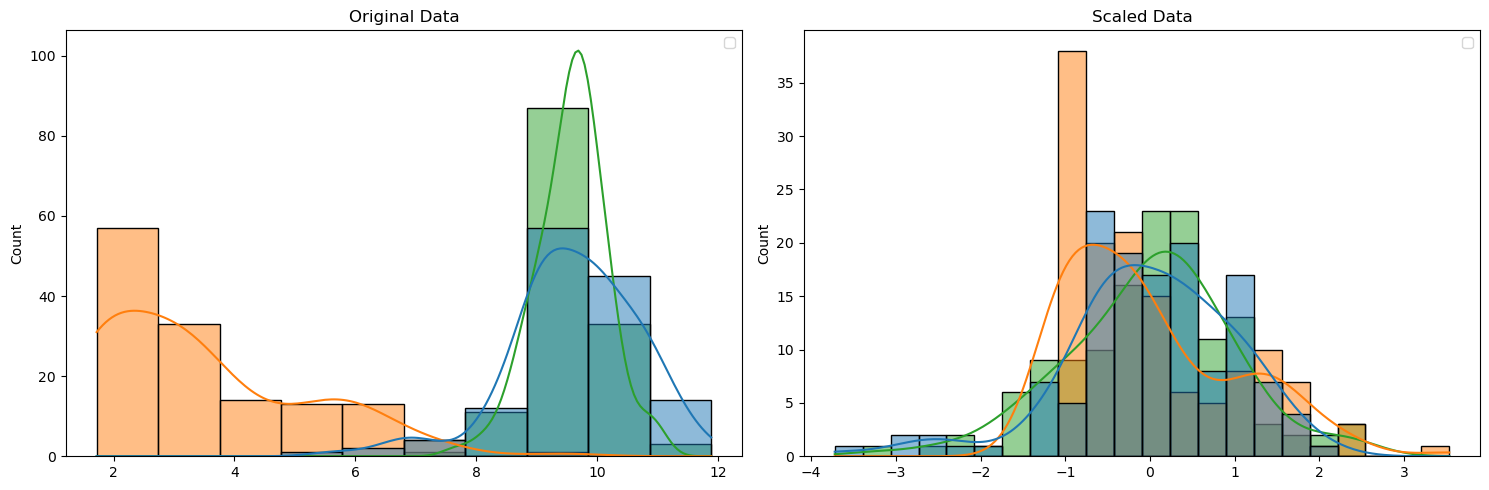

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select a few columns for visualization
columns_to_visualize = ['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419']

# Create a DataFrame with only the selected columns
df_selected = df[columns_to_visualize]

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Flatten the array of axes for easier indexing
axs = axs.flatten()

# Plot the original data with coloring for tumor types
sns.histplot(data=df_selected, ax=axs[0], kde=True)
axs[0].set_title('Original Data')
axs[0].legend(loc='upper right')

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
df_selected_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

# Plot the scaled data with coloring for tumor types
sns.histplot(data=df_selected_scaled, ax=axs[1], kde=True)
axs[1].set_title('Scaled Data')
axs[1].legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


As you see, it is possible to plot a histogram with a 'wide' version of the data instead of a 'long'. However, the longer data representation is more versatile: 
There is a built in function in pandas, that can be used to get a long version of our data: melt().
The long format allows us to use the 'hue' parameter in the histogram function to color our plots. 


c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


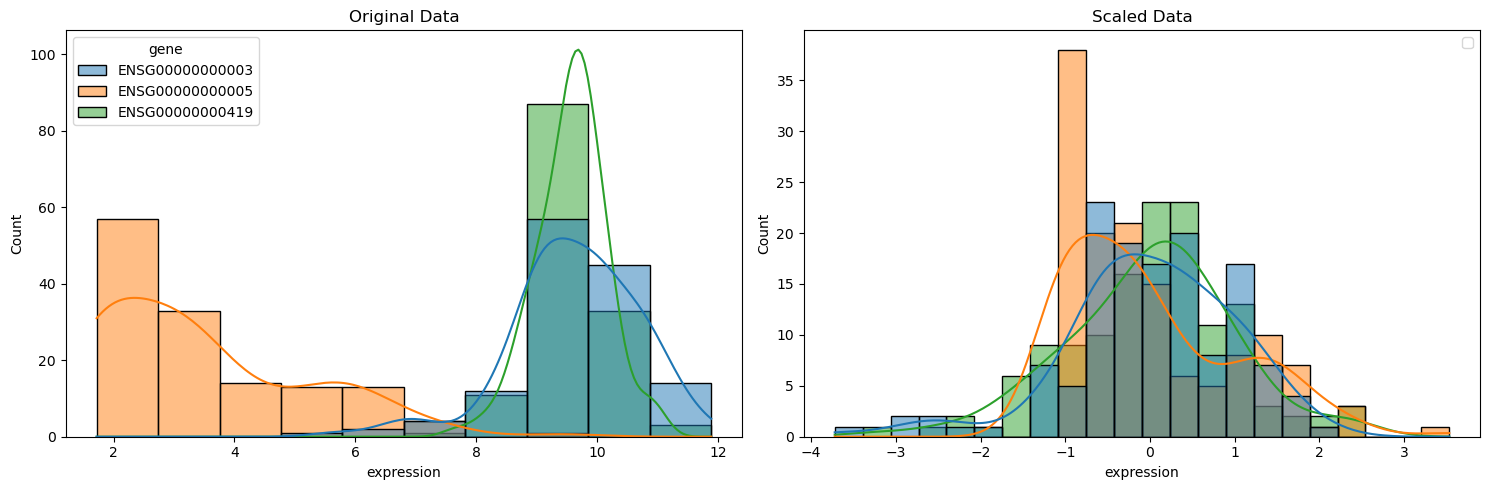

In [53]:
# Select a few columns for visualization
columns_to_visualize = ['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419']

# Create a DataFrame with only the selected columns and the 'tumor_type' column
df_selected = df[columns_to_visualize + ['tumor_type']]

# Melt the data to long-form
df_long = pd.melt(df_selected, id_vars='tumor_type', var_name='gene', value_name='expression')

# Create a figure with 2 subplots
# It is possible to create as much subplots as you want, here we have a 1 x 2 grid.
# we could also have a 2 x 2 or 10 x 3 grid etc.
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Flatten the array of axes for easier indexing (single digit indexing instead of [i,j])
axs = axs.flatten()

# Plot the original data with coloring for tumor types
sns.histplot(data=df_long, x='expression', hue='gene', ax=axs[0], kde=True)
axs[0].set_title('Original Data')
# axs[0].legend(loc='upper right')

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
df_selected_scaled = pd.DataFrame(scaler.fit_transform(df_selected.drop('tumor_type', axis=1)), columns=df_selected.columns[:-1])

# Add the 'tumor_type' column back to the scaled data
df_selected_scaled['tumor_type'] = df_selected['tumor_type']

# Melt the scaled data to long-form
df_long_scaled = pd.melt(df_selected_scaled, id_vars='tumor_type', var_name='gene', value_name='expression')

# Plot the scaled data with coloring for tumor types
sns.histplot(data=df_long_scaled, x='expression', hue='gene', ax=axs[1], kde=True)
axs[1].set_title('Scaled Data')
# axs[1].legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.legend(loc='best')
plt.show()


### Exercise 1.0 - Plotting and observing the data

1. Plot different genes (just select some at random and compare how they are distributed)
2. Plot the same plot, but change the coloring to resemble the tumor type. <br>
If you are feeling adventurous, try to build a 2 x 2 grid plot and plot the gene coloring in the top row and the tumoir coloring in the bottom.
3. Wopuld it be possible to distinguish the two tissues with the genes you selected?


Although, we do sometimes see a clear difference in distribution, we'll stay with the non-scaled version for now.
However, keep in mind that this can have a large impact on the performance of your classifiers.
Checking the distribution of your data before making a decision is a good habit in general.

## Clustering

Clustering is an unsupervised learning technique used to group similar data points together. It's a useful tool for exploratory data analysis, as it can help to identify patterns and structures in the data. In this section, we'll perform two types of clustering: k-means and hierarchical clustering. We'll also perform principal component analysis (PCA) to reduce the dimensionality of the data and compare the results of the clustering methods on the complete data.

### K-Means Clustering

K-means clustering is a centroid-based clustering algorithm that aims to partition the data into K distinct, non-overlapping clusters. The algorithm works by initializing K centroids randomly, and then iteratively assigning each data point to the closest centroid and updating the position of the centroids based on the mean of the data points assigned to them.

Here's how you can perform k-means clustering on the first three columns of our data:


c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<class 'numpy.int32'>


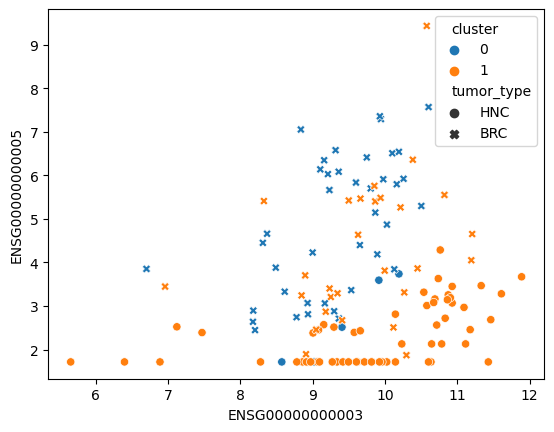

In [75]:
from sklearn.cluster import KMeans

# Select the first three columns for clustering
X = df.iloc[:, 3:5]

# Initialize the KMeans object with 3 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_
print(type(labels[0]))
# Add the cluster labels to the data frame
df['cluster'] = labels

# Plot the data with coloring for the clusters
sns.scatterplot(data=df, x='ENSG00000000003', y='ENSG00000000005', hue='cluster', style='tumor_type')
plt.show()


Above, we're using the first two numerical columns of our data for clustering and plotting, but you can select any subset of columns that you're interested in. Of course clustering in just two dimensions is not very close to a real world use, we are just using this to be more approachable for now :)

### Hierarchical Clustering

Hierarchical clustering is a clustering algorithm that builds a hierarchy of clusters by iteratively merging the closest pairs of clusters until only a single cluster remains. The result is a dendrogram, which is a tree-like diagram that shows the hierarchical relationship between the clusters.

Here's how you can perform hierarchical clustering on the mini sub set of our columns of our data:

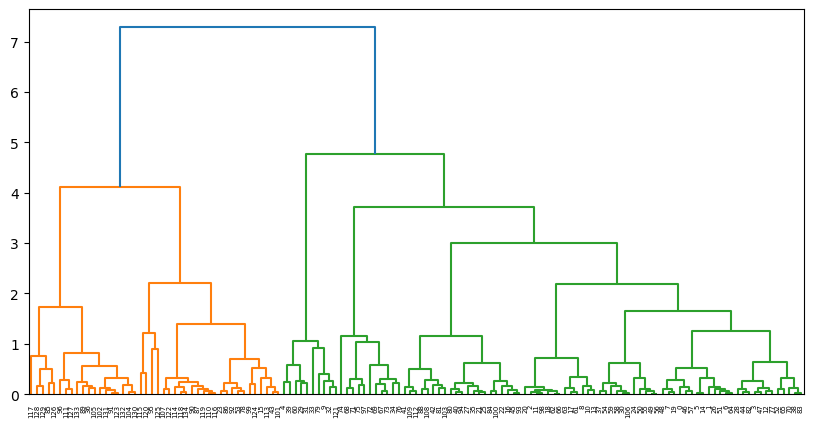

<class 'numpy.intc'>


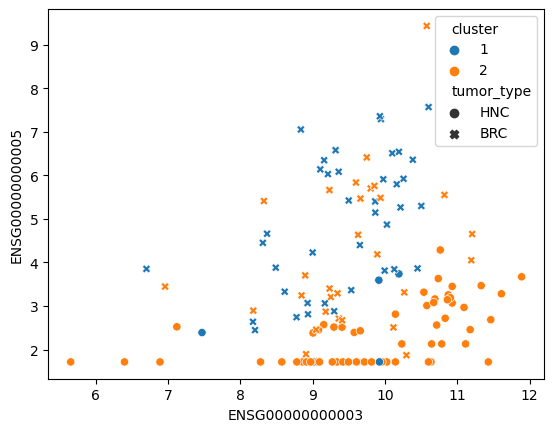

In [77]:
import scipy.cluster.hierarchy as hc

# Select the first three columns for clustering
X = df.iloc[:, 3:5]
# Compute the linkage matrix
linkage_matrix = hc.linkage(X, method='ward')

# Generate the dendrogram
fig = plt.figure(figsize=(10, 5))
dn = hc.dendrogram(linkage_matrix)
plt.show()

# get the clusters, to be able to plot them
labels_hierarchical = hc.fcluster(linkage_matrix, 2, criterion='maxclust')
print(type(labels_hierarchical[0]))
plt_df = df.assign(cluster=labels_hierarchical)

# Plot the data with coloring for the clusters
sns.scatterplot(data=plt_df, x='ENSG00000000003', y='ENSG00000000005', hue='cluster', style='tumor_type', palette="tab10")
plt.show()


Above, we use the 'ward' linkage method, which aims to minimize the variance within each cluster. It's one of the more 'modern' methods and works quite well in most cases.
However, you can experiment with different methods, such as 'single' or 'complete', to see how they affect the results, this will make more sense iun the next part though. 

### PCA and Comparison of Clustering Methods

You already know Principal component analysis (PCA). We'll perform PCA on our complete data and compare the results of the k-means and hierarchical clustering methods on the reduced data (to save time) and the plot of the first two PCs.
Dimension reduction techniques are often used in such a way, e.g. before clustering or other machine learning techniques, especially with so high dimensional data such as ours. 


c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


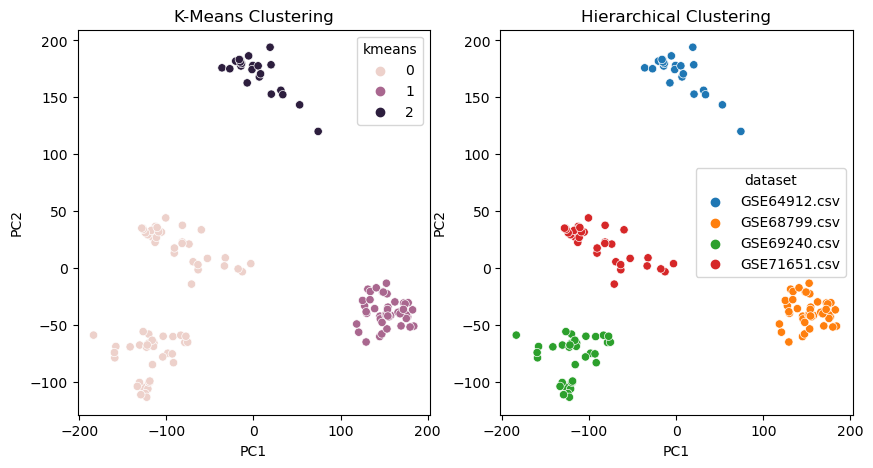

In [86]:
from sklearn.decomposition import PCA

# metadata cols, we'll use them throughout the script.
meta_cols = ["class" ,"dataset" ,"tumor_type" ,"cluster"]

# Perform PCA on the complete data
pca = PCA(n_components=50)

# get the numeric data
X_pca = pca.fit_transform(df.drop(meta_cols, axis=1))

# Perform k-means clustering on the PCA data
kmeans = KMeans(n_clusters=3)
labels_kmeans = kmeans.fit_predict(X_pca)

# Perform hierarchical clustering on the PCA data
linkage_matrix = hc.linkage(X_pca, method='ward')
labels_hierarchical = hc.fcluster(linkage_matrix, 3, criterion='maxclust')

# Create a new data frame with the PCA data and the cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PC' + str(i) for i in range(1, 51)])
df_pca['kmeans'] = labels_kmeans
df_pca['hierarchical'] = labels_hierarchical
df_pca['tumor_type'] = df['tumor_type'].to_list()
df_pca['class'] = df['class'].to_list()
df_pca['dataset'] = df['dataset'].to_list()

# Plot the PCA data with coloring for the clusters
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# K-means clustering
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='kmeans', ax=axs[0])
axs[0].set_title('K-Means Clustering')

# Hierarchical clustering
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='dataset', ax=axs[1])
axs[1].set_title('Hierarchical Clustering')

plt.show()


It seems, we have a very clear effect to observe here, that has nothing to do with the tissue or tumor class :D 

Execise 3 - scaleed data
1. Run the PCA again with scaled data and see how this changes the PCA. Check how we used the scaler above and apply it to the complete dataset. Use this as an input to the PCA function and the rest can remain unchanged. Add the df.index to the new scaled dataframe, with the set_index() function. Use the .Join() function, to add the metadata (df[meta_cols]).
2. Observe how the plot has changed, play around with colors and styles and see, if the projection of the data is more sensible now
3. Is there still room for improvement? What could we do about it? Discuss with your fellow students.

c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\maxsp\miniconda3\envs\bioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


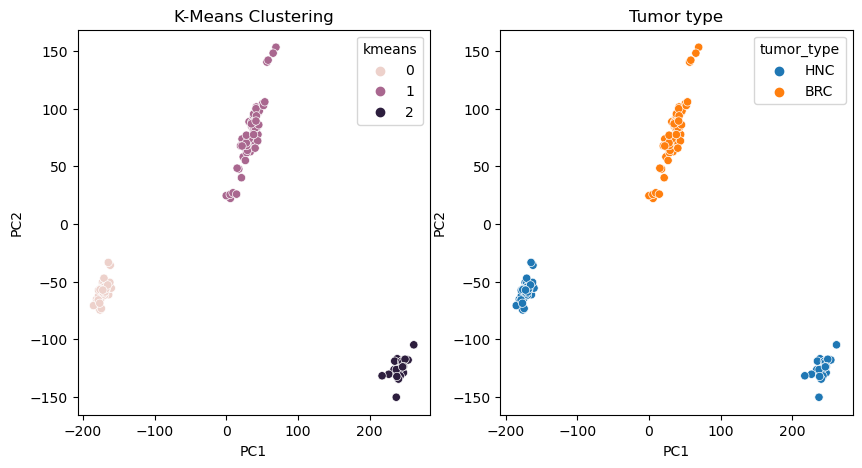

In [141]:
from sklearn.decomposition import PCA

# metadata cols, we'll use them throughout the script.
meta_cols = ["class" ,"dataset" ,"tumor_type" ,"cluster"]
num_cols = df.drop(meta_cols, axis=1).columns

# Perform PCA on the complete data
pca = PCA(n_components=50)

# build scaled dataframe, you'll need it later!
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(meta_cols, axis=1)), columns=df.drop(meta_cols, axis=1).columns)
df_scaled = df_scaled.set_index(df.index)
df_scaled.join(df[meta_cols]) 

# get the numeric data
X_pca = pca.fit_transform(df_scaled.drop(meta_cols, axis=1))

# Perform k-means clustering on the PCA data
kmeans = KMeans(n_clusters=3)
labels_kmeans = kmeans.fit_predict(X_pca)

# Perform hierarchical clustering on the PCA data
linkage_matrix = hc.linkage(X_pca, method='ward')
labels_hierarchical = hc.fcluster(linkage_matrix, 3, criterion='maxclust')

# Create a new data frame with the PCA data and the cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PC' + str(i) for i in range(1, 51)])
df_pca['kmeans'] = labels_kmeans
df_pca['hierarchical'] = labels_hierarchical
df_pca['tumor_type'] = df['tumor_type'].to_list()
df_pca['class'] = df['class'].to_list()
df_pca['dataset'] = df['dataset'].to_list()

# Plot the PCA data with coloring for the clusters
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# K-means clustering
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='kmeans', ax=axs[0])
axs[0].set_title('K-Means Clustering')

# Hierarchical clustering
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='tumor_type', ax=axs[1])
axs[1].set_title('Tumor type')

plt.show()


## Feature selection 

Feature selection is the process of selecting a subset of relevant features for use in model construction. It can be very important for machine learning applications, as it can improve the accuracy and interpretability of the models, as well as reduce the computational cost of training them. In this section, we'll discuss two feature selection methods, one very simple and one more sophisticated, based on a macgine learning model itself: variance filtering and LASSO. <br>We'll use the feature selection on the non-scaled data!

### Variance Filtering
Variance filtering is a simple feature selection method that removes features with low variance. The idea behind this method is that features with low variance are unlikely to be informative, as they don't vary much across the samples.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold



In [151]:
from sklearn.feature_selection import VarianceThreshold

# Initialize the VarianceThreshold object with a variance threshold of 0.1
variance_threshold = VarianceThreshold(threshold=1.5)

# Fit the model to the data and transform the data
X_filtered = variance_threshold.fit_transform(df.drop(meta_cols, axis=1))

# Get the names of the remaining features
feature_names = df.drop(meta_cols, axis=1).columns[variance_threshold.get_support()]

# Print the number of remaining features
print(f'Number of remaining features: {X_filtered.shape[1]}')


Number of remaining features: 9573


### LASSO

Least absolute shrinkage and selection operator (LASSO) is a regression-based feature selection method that adds a penalty term to the loss function, which encourages the model to assign zero coefficients to irrelevant features. In the context of feature selection, we can use LASSO to identify genes that are associated with the tumor/normal classification. 

See: https://scikit-learn.org/stable/modules/linear_model.html#lasso

To perform the feature selection with LASSO, we applz it as we would when using it for classification:<br> 
For this we'll need a target variable *y*, that resembles the tumor type. Later we'll build classifiers for both the tumor type as well as the class, but here we'll use the tumor type for selecttion, as this is likely the "stronger" variable, more changes between the different tissues than between healthy and cancerous tissues. We expect, that using this to filter for more impactful features, will also weed out features that are not impactful for the differences between classes, but we cannot know this for sure of course. In reality such problems are not super common and more related to the batch effect aspects we already mentioned. However, in real life, we'd likely run multiple experiments with different classifiers and targets, to be able to better assess the data, also we'd likely split the problem into two and have one dataset with a designated feature selection and preprocessing pipeline per Problem. <br>

We'll need to transform our target variable into a numeral, as to enable scikit-learn to use it. Luckyly scikit learn provides a solution already: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [109]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import LabelEncoder

# Split the data into input (X) and output (y) variables
X = df.drop(meta_cols, axis=1)

# init and fit labelencoder
le = LabelEncoder()
le.fit(df["tumor_type"])

y = le.transform(df['tumor_type'])

# Fit a LASSO model to the data
lasso = LassoCV(alphas=[0.01, 0.1, 1.0], cv=5)
lasso.fit(X, y)

# Get the coefficients of the model
coef = lasso.coef_

# Select the genes with non-zero coefficients
selected_genes = X.columns[coef != 0]

# Print the number of selected genes
print(f"Number of selected genes: {len(selected_genes)}")


Number of selected genes: 55


Exercise 4 - Feature selection
1. Try out multiple variance thresholds
2. Optional: The LASSO seems to be quite stringent from the get-go! If you have the time, check the distribution of some of the genes, that are left after selection.
3. Visualize the selected features of LASSO with a heatmap. Seaborn features a heatmap() and a clustermap() function, which would be more appropriate? Which has more functionality? Do we want to annotate the heatmap with additional information for example, which? try both scaled and non-scaled DFs
4. Set the variance low enough to be comparable and make another heatmap from the features selected by variance threshold.

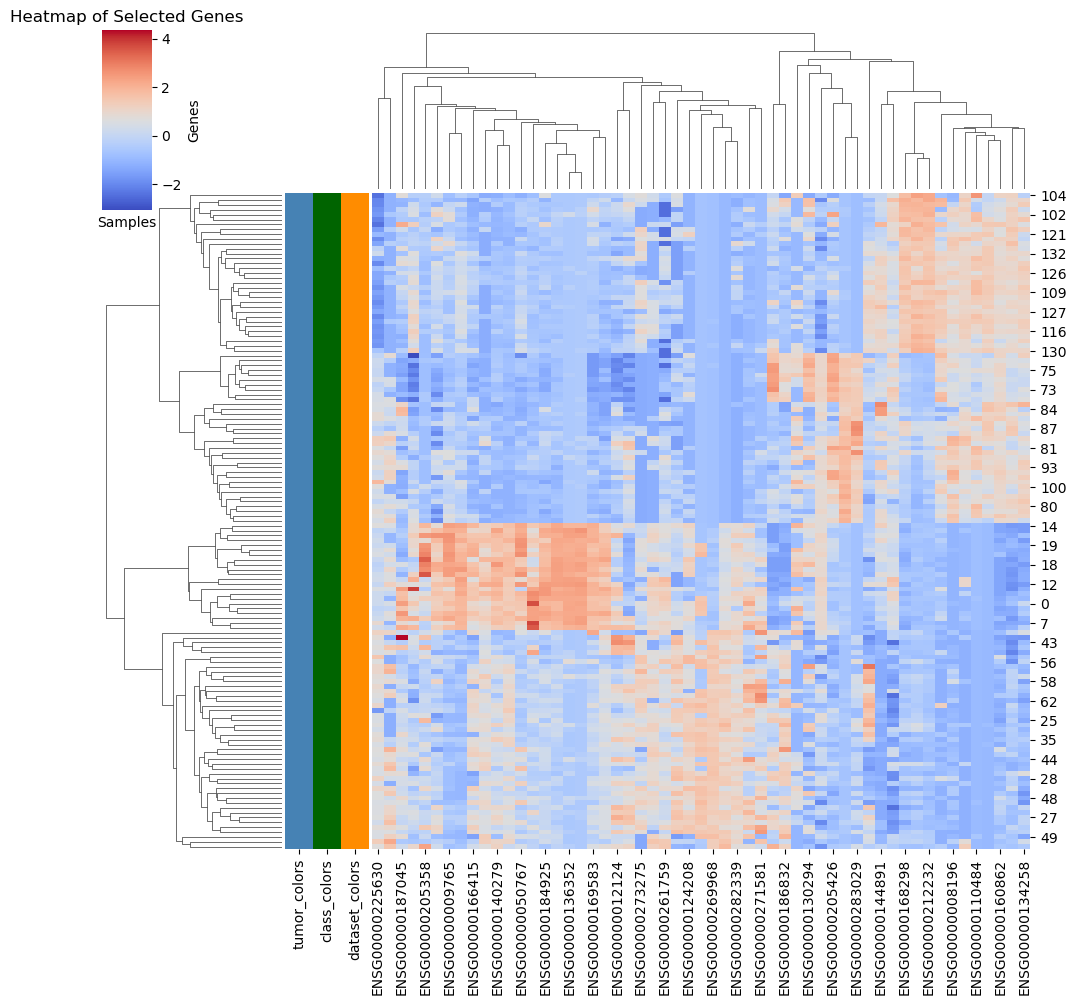

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# addd color to annotate metadata
lut = dict(zip(df.tumor_type.unique(), ["steelblue", "orange"]))
tumor_colors = df.tumor_type.map(lut)
lut = dict(zip(df["class"].unique(), ["darkgreen", "darkred"]))
class_colors = df["class"].map(lut)
lut = dict(zip(df.dataset.unique(), ["darkorange", "darkblue", "green", "blue"]))
dataset_colors = df.dataset.map(lut)
color_dataframe = pd.DataFrame({"tumor_colors":tumor_colors, "class_colors":class_colors, "dataset_colors":dataset_colors})


# Create a heatmap of the gene expression data for the selected genes
sns.clustermap(df[selected_genes], cmap='coolwarm', row_colors=color_dataframe)

# Add labels to the heatmap
plt.title('Heatmap of Selected Genes')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.xticks(rotation=90)

# Show the plot
plt.show()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994,class,dataset,tumor_type,cluster
ID,,,,,,,,,,,,,,,,,,,,,
SRR1754117,1.385999,-0.305064,0.713717,-0.396448,-0.332283,0.938848,1.743260,1.638205,0.149439,0.136832,...,1.902121,0.136240,0.602016,0.567744,-0.998395,-0.722063,Tumor,GSE64912.csv,HNC,1
SRR1754118,1.232279,-0.245217,0.386787,-0.314400,0.182003,0.669301,1.811937,0.616422,-0.161291,0.801390,...,1.902121,0.136240,0.955572,0.567744,-0.998395,-0.422090,Tumor,GSE64912.csv,HNC,1
SRR1754119,1.733847,-0.472813,0.410953,0.458478,-0.353616,-0.094404,1.813044,1.395272,0.316726,1.593574,...,1.902121,0.136240,1.380558,2.353246,-0.998395,-1.293291,Tumor,GSE64912.csv,HNC,1
SRR1754120,1.077644,0.477833,0.473737,-0.736355,-1.029265,-0.102392,1.193462,1.504187,0.010819,0.087139,...,1.902121,0.136240,1.774883,0.567744,-0.998395,-1.024514,Tumor,GSE64912.csv,HNC,1
SRR1754121,1.871661,-0.119720,1.173753,1.044948,-0.149311,-0.453462,0.782097,1.299050,-0.158346,0.363670,...,1.902121,0.136240,0.941430,0.567744,-0.998395,-1.813514,Tumor,GSE64912.csv,HNC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR2148263,0.512420,1.374283,-1.137969,0.594419,-0.269457,-0.409271,0.037911,0.448603,-0.819544,-1.091272,...,0.027494,-0.406331,0.775093,-0.218366,0.671797,0.160522,Tumor,GSE71651.csv,BRC,0
SRR2148264,0.337589,1.442078,-1.251102,0.915056,0.062504,-0.719724,0.303255,-0.194165,-0.815766,-0.733219,...,0.027494,2.353648,0.722462,-0.218366,1.098768,0.254316,Tumor,GSE71651.csv,BRC,0
SRR2148265,-0.241734,1.544226,-1.352391,0.351081,-0.263603,-0.710219,0.265504,-0.623570,-1.258472,-0.481778,...,0.027494,-0.406331,1.583688,-0.218366,1.477161,1.395115,Normal,GSE71651.csv,BRC,0
